## Video 6.1

In [8]:
import gensim
import nltk
import numpy as np
from sklearn.decomposition import PCA
from nltk.corpus import  brown,gutenberg
import nltk.corpus
import matplotlib.pyplot as plt

%matplotlib inline

## Start with Brown corpus from NLTK

In [2]:
nltk.download('brown')
# Grab Brown corpus from NLTK if not already downloaded

[nltk_data] Downloading package brown to /home/alex/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [9]:
len(nltk.corpus.brown.sents())

57340

In [10]:
sentences = brown.sents()

In [11]:
sentences[0]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced',
 '``',
 'no',
 'evidence',
 "''",
 'that',
 'any',
 'irregularities',
 'took',
 'place',
 '.']

## Create a word2vec vector space model

In [12]:
%time model = gensim.models.word2vec.Word2Vec(sentences, \
    size=100, window=5, min_count=5, workers=4, hs=1,negative=0)

CPU times: user 44.9 s, sys: 1.59 s, total: 46.5 s
Wall time: 38.1 s


In [13]:
model.most_similar('mother')

[('father', 0.9129737615585327),
 ('husband', 0.8275225162506104),
 ('son', 0.8102298974990845),
 ('brother', 0.7994810342788696),
 ('wife', 0.7746838331222534),
 ('sister', 0.7300003170967102),
 ('voice', 0.7246291637420654),
 ('uncle', 0.7214094400405884),
 ('friend', 0.704196572303772),
 ('fellow', 0.682498574256897)]

In [14]:
model.doesnt_match(['king','queen','prince','Edward'])

'Edward'

## Use Pretrained Google News Vectors

### Grab from [here](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)

In [64]:
%time model = gensim.models.KeyedVectors.load_word2vec_format(\
                        './GoogleNews-vectors-negative300.bin', binary=True)  

CPU times: user 36.9 s, sys: 2.66 s, total: 39.6 s
Wall time: 39.6 s


## Visualise

In [65]:
X = model[model.wv.vocab]

In [66]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

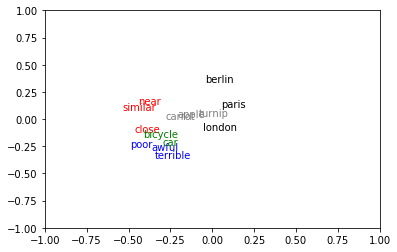

In [91]:
words = list(model.wv.vocab)

colours=['black','red','blue','grey','green']

for n,wordList in enumerate([['paris','london','berlin'],['near','close','similar'],\
        ['terrible','awful','poor'],['carrot','apple','turnip'],['car','bicycle']]):
    for nn,word in enumerate(wordList):
        i=words.index(word)
        plt.annotate(word, xy=(result[i, 0], result[i, 1]),color=colours[n])
    
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()